In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
df = pd.read_csv("./AQ_data/14634/2019/so2.csv", index_col=0, parse_dates=True)

<Axes: xlabel='Timestamp'>

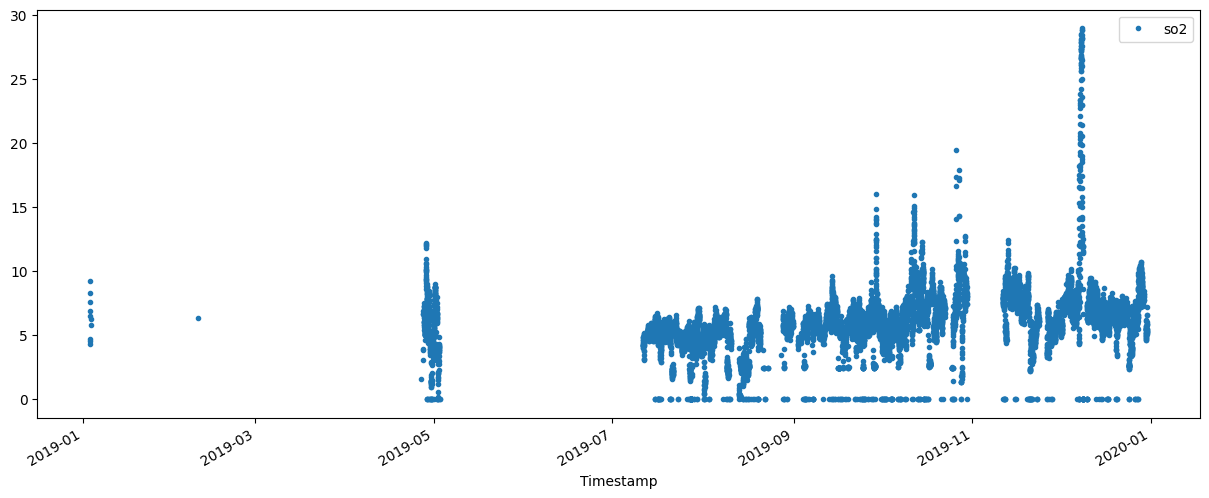

In [38]:
df.plot(linestyle="None", marker=".", figsize=(15,6))

In [17]:
df.reset_index().duplicated().sum()

np.int64(0)

In [28]:
type(df.index[0])

str

In [29]:
df.index = pd.to_datetime(df.index)

<Axes: xlabel='Timestamp'>

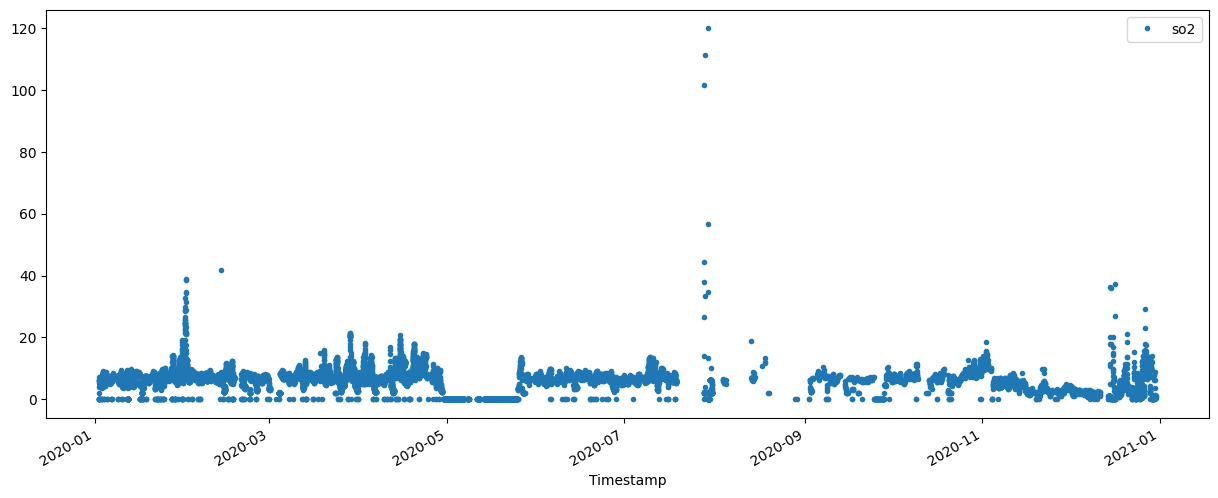

In [42]:
import pandas as pd
df = pd.read_csv("./AQ_data/14634/2020/so2.csv", index_col=0, parse_dates=True)
df.index = pd.to_datetime(df.index)
df.plot(linestyle="None", marker=".", figsize=(15,6))

In [43]:
import json
with open('response_1756734808678.json', 'r') as f:
    blr_sensors = json.load(f)

In [56]:
sensor_ids = [f['id'] for f in blr_sensors['results'][0]['sensors']]

In [85]:
[f['name'] for f in blr_sensors['results']]

['Peenya, Bengaluru - KSPCB',
 'BTM Layout, Bengaluru - KSPCB',
 'City Railway Station - KSPCB',
 'SaneguravaHalli - KSPCB',
 'BWSSB Kadabesanahalli, Bengaluru - KSPCB',
 'BWSSB Kadabesanahalli, Bengaluru - CPCB',
 'BTM Layout, Bengaluru - CPCB',
 'City Railway Station, Bengaluru - KSPCB',
 'Peenya, Bengaluru - CPCB',
 'Sanegurava Halli, Bengaluru - KSPCB',
 'Jayanagar 5th Block, Bengaluru - KSPCB',
 'Bapuji Nagar, Bengaluru - KSPCB',
 'Silk Board, Bengaluru - KSPCB',
 'Hombegowda Nagar, Bengaluru - KSPCB',
 'Hebbal, Bengaluru - KSPCB',
 'blore_India_07_14_official',
 'SiriJaya',
 'RVCE-Mailasandra, Bengaluru - KSPCB',
 'Kasturi Nagar, Bengaluru - KSPCB',
 'Shivapura_Peenya, Bengaluru - KSPCB',
 'Jigani, Bengaluru - KSPCB']

In [57]:
import requests

In [61]:
import json
with open("credentials.json", 'r') as f:
    credentials = json.load(f)

In [62]:
credentials

{'OPENAQ-API-KEY': '11d15f383ed4dc3610e04f146551cf6322fbfd0652d03afc96a251d71611e05d'}

In [65]:
headers = {
    "X-API-Key": credentials['OPENAQ-API-KEY']
}

In [67]:
response = requests.get(url="https://api.openaq.org/v3/sensors/1518", headers=headers)

In [74]:
response.json()['results'][0]['datetimeFirst']['utc'], response.json()['results'][0]['datetimeLast']['utc']

('2016-03-22T03:15:00Z', '2018-02-22T02:45:00Z')

In [83]:
sensor_ids = [f['id'] for f in blr_sensors['results'][2]['sensors']]
first_dates = []
last_dates=[]
for id in sensor_ids:
    url = f"https://api.openaq.org/v3/sensors/{id}"
    res = requests.get(url, headers=headers).json()
    first_date, last_date = res['results'][0]['datetimeFirst']['utc'], res['results'][0]['datetimeLast']['utc']
    first_dates.append(first_date)
    last_dates.append(last_date)
    print(f"id - {id} | First_date: {first_date} | Last_name: {last_date}")

set(first_dates), set(last_dates)

id - 1384 | First_date: 2016-03-21T14:00:00Z | Last_name: 2018-02-22T03:00:00Z
id - 1383 | First_date: 2016-03-22T09:00:00Z | Last_name: 2018-02-22T03:00:00Z
id - 1382 | First_date: 2016-03-21T14:00:00Z | Last_name: 2018-02-22T03:00:00Z
id - 14096 | First_date: 2017-06-19T20:00:00Z | Last_name: 2018-02-21T13:30:00Z


({'2016-03-21T14:00:00Z', '2016-03-22T09:00:00Z', '2017-06-19T20:00:00Z'},
 {'2018-02-21T13:30:00Z', '2018-02-22T03:00:00Z'})

In [86]:
client

NameError: name 'client' is not defined